In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/log_reg.csv')
df



,x,y,color
0,-4.956506,25.706334,0.0
1,2.897218,10.359784,0.0
2,-4.488273,22.113311,0.0
3,3.823152,15.665060,0.0
4,4.425201,21.118726,0.0
...,...,...,...
3995,-2.159130,3.109645,1.0
3996,-4.506705,19.178030,1.0
3997,-0.000344,-1.611153,1.0
3998,3.981467,14.326529,1.0


In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(df[['x','y']],df['color'],test_size=0.2,random_state=69,stratify = df['color'])

In [ ]:
xtrain


,x,y
671,-1.663169,4.734317
2780,0.071506,-1.376924
708,-0.067402,1.351108
3849,2.842893,6.222716
1865,-1.019947,2.064296
...,...,...
546,-0.717661,2.088789
2037,-4.839936,21.892581
1367,-4.028346,17.908563
1590,-2.400634,7.237055


In [ ]:
ytrain

,color
671,0.0
2780,1.0
708,0.0
3849,1.0
1865,0.0
...,...
546,0.0
2037,1.0
1367,0.0
1590,0.0


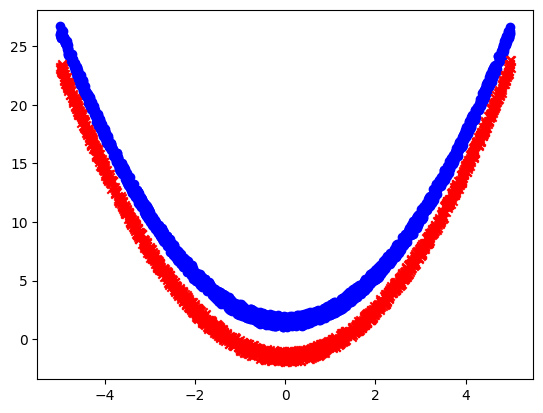

In [ ]:
df0 = df[df['color']== 0]
df1 = df[df['color']== 1]

plt.figure(1)
plt.scatter(x=df0['x'],y=df0['y'],marker='o',color='blue')
plt.scatter(x=df1['x'],y=df1['y'],marker='x',color='red')
plt.show()

In [ ]:
x = np.array(xtrain['x']/5)
y = np.array(xtrain['y']/25)
Y = np.array(ytrain)

n = len(x)
n

3200

In [ ]:
co = np.array([0.0]*3)
fe = np.array([x*x,x,y])
dco = np.array([0.0]*3)
c=0.0

def z(co,fe,n,c):
  return np.dot(co,fe)+c

def g(co,fe,n,c):
  return 1/(1+np.e**(-z(co,fe,n,c)))

def j(co,fe,n,Y,c):
  return np.sum(-Y*np.log(g(co,fe,n,c))-(1-Y)*np.log(1-g(co,fe,n,c)))/n

j(co,fe,n,Y,c)

np.float64(0.6931471805599452)

In [ ]:
def dj(co,fe,n,Y,c,dco):
  for i in range(3):
    dco[i] = np.sum((g(co,fe,n,c)-Y)*fe[i])/n
  return
def djc(co,fe,n,Y,c):
  return np.sum((g(co,fe,n,c)-Y))/n


lr = 1
dj(co,fe,n,Y,c,dco)


while not((max(abs(dco)))<10**(-3) and abs(djc(co,fe,n,Y,c))<10**(-3)):
  dj(co,fe,n,Y,c,dco)

  tc = c - lr*djc(co,fe,n,Y,c)
  co = co - lr*dco
  c = tc
  print(j(co,fe,n,Y,c))

print(co,c,j(co,fe,n,Y,c))

[ 5.70171392e+01  2.56562984e-02 -5.73237758e+01] 0.0922419755019056 0.03844533133239197


[ 5.70169395e+01  2.56563650e-02 -5.73235763e+01] 0.09224209329625288 0.0384457302834033

In [ ]:
xp = np.array(xtest['x']/5)
yp = np.array(xtest['y']/25)
YP = np.array(ytest)

fep = np.array([xp*xp,xp,yp])

def zp(co,fep,n,c):
  return np.dot(co,fep)+c

In [ ]:
def pred(co,fep,n,c):
  if zp(co,fep,n,c) >= 0:
    return 1
  else:
    return 0


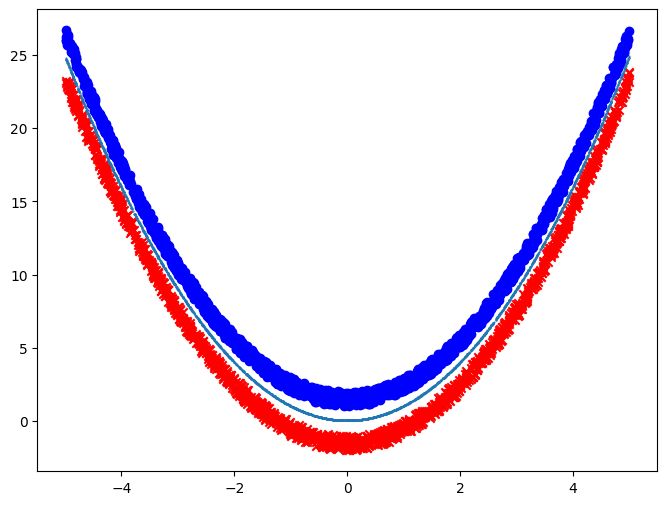

In [ ]:
xtrain_0 = xtrain[ytrain == 0]
xtrain_1 = xtrain[ytrain == 1]

plt.figure(figsize=(8, 6))
plt.scatter(x=xtrain_0['x'], y=xtrain_0['y'], marker='o', color='blue', label='Class 0')
plt.scatter(x=xtrain_1['x'], y=xtrain_1['y'], marker='x', color='red', label='Class 1')

plt.scatter(x*5,-(co[0]*x*x+co[1]*x+c)*25/co[2],marker='.',s=1)

plt.show()

In [ ]:
count = 0

for i in range(len(xtest)):
  if(pred(co,fep[:,i],n,c) == YP[i]):
    count+=1

print(count*100/len(xtest),'% accuracy')

100.0 % accuracy


In [ ]:
xtest,ytest

(             x          y
 2304 -0.407602  -1.069760
 132  -1.160224   2.953784
 3513  0.167294  -1.273280
 525  -1.232600   3.436608
 625  -3.582077  14.338816
 ...        ...        ...
 2988 -3.300075   8.996866
 881  -2.700672   8.675958
 534  -0.203144   1.329248
 747  -4.824634  24.752510
 619   4.597138  22.998808
 
 [800 rows x 2 columns],
 2304    1.0
 132     0.0
 3513    1.0
 525     0.0
 625     0.0
        ... 
 2988    1.0
 881     0.0
 534     0.0
 747     0.0
 619     0.0
 Name: color, Length: 800, dtype: float64)

In [ ]:
xin = float(input('Enter x: '))
yin = float(input('Enter y: '))

print(pred(co,np.array([xin*xin/25,xin/5,yin/25]),n,c))

Enter x: 0
Enter y: 0
1
